Homework 1.1

In [1]:
import pandas as pd
import numpy as np

# Random state for reproducibility
np.random.seed(0)

In [2]:
# read the data
df = pd.read_csv("C:/Users/JT von Seggern/DS Masters Repos/2025-summer-mod-6/homework_1.1.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,X1,X2,X3,Y
0,-0.440646,-0.390227,0.156718,-0.877671
1,-3.810099,-1.304665,-1.105117,-10.130388
2,-1.425451,-0.340049,1.115908,0.284068
3,-1.325750,0.161906,-0.254670,-1.994344
4,3.120263,1.487343,-1.164839,2.030030


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   float64
 3   Y       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [4]:
df.describe()

,X1,X2,X3,Y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.045555,0.030001,0.057442,0.278379
std,2.191768,0.981732,1.050014,5.201346
min,-6.163467,-2.703008,-3.348274,-13.862793
25%,-1.465901,-0.662930,-0.677971,-3.396553
50%,0.039807,0.001803,0.029222,0.044328
75%,1.502296,0.688336,0.768379,3.694404
max,8.464936,3.153685,3.871509,18.146133


In [5]:
# Perform linear regression
from sklearn.linear_model import LinearRegression

# Split the data into features and target variable
X = df.drop(columns=['Y'])
y = df['Y']

In [6]:
def regress(features, target):
    """
    Perform linear regression on the given features and target variable
    
    Parameters:
    features (pd.DataFrame): The feature variables
    target (pd.Series): The target variable
    
    Returns:
    model (LinearRegression): The fitted linear regression model
    coefficents (np.array): The coefficients of the model
    intercept (float): The intercept of the model
    """
    # Initialize the linear model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(features, target)

    # Get the coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_

    return model, coefficients, intercept

In [7]:
# Run Linear Regresson on the data
model_all, coefficients_all, intercept_all = regress(X,y)

print("Coefficients for all features:", coefficients_all)
print("Intercept for all features:", intercept_all)

Coefficients for all features: [1.00713766 1.96456859 2.97548854]
Intercept for all features: 0.0026430033841688405


In [8]:
# Run linear regression on each feature individually
results_df = {}

#Loop through each feature and run regression
for col in X.columns:
    model, coefficients, intercept = regress(X[[col]], y)
    results_df[col] = {
        'model': model,
        'coefficients': coefficients,
        'intercept': intercept
    }

results_df = pd.DataFrame.from_dict(results_df, orient='index')
results_df

,model,coefficients,intercept
X1,LinearRegression(),[1.8417610991461835],0.194478
X2,LinearRegression(),[4.083612579373998],0.155867
X3,LinearRegression(),[3.097041202049842],0.100479


In [9]:
# compute the t-statistic for each coefficient
import statsmodels.api as sm

X_w_constant = sm.add_constant(X)
model = sm.OLS(y, X_w_constant).fit()

# print the summary of the model and t_values for the features
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                        08:59:10   Log-Likelihood:                -727.62
No. Observations:                1000   AIC:                             1463.
Df Residuals:                     996   BIC:                             1483.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.016      0.166      0.8

In [10]:
# read the next homework file
df2 = pd.read_csv("C:/Users/JT von Seggern/DS Masters Repos/2025-summer-mod-6/homework_1.2.csv")
df2 = df2.drop(columns=["Unnamed: 0"])
df2.head()

,X,Y,Z
0,0,0.548814,0.548814
1,1,1.215189,0.715189
2,0,0.602763,0.602763
3,0,0.544883,0.544883
4,0,0.423655,0.423655


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    int64  
 1   Y       100 non-null    float64
 2   Z       100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [12]:
df2.describe()

,X,Y,Z
count,100.000000,100.000000,100.000000
mean,0.480000,0.712794,0.472794
std,0.502117,0.470185,0.289754
min,0.000000,0.004695,0.004695
25%,0.000000,0.265181,0.205803
50%,0.000000,0.658820,0.467481
75%,1.000000,1.141414,0.684483
max,1.000000,1.488374,0.988374


Text(0, 0.5, 'Z')

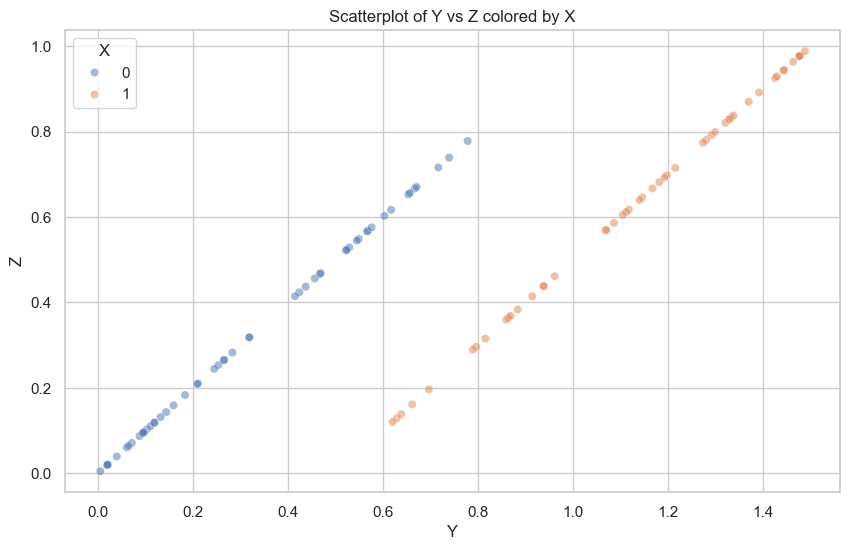

In [13]:
# Plot the df2 data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))

sns.scatterplot(data=df2, x='Y', y='Z', hue='X', alpha=.5)
plt.title("Scatterplot of Y vs Z colored by X")
plt.xlabel("Y")
plt.ylabel("Z")


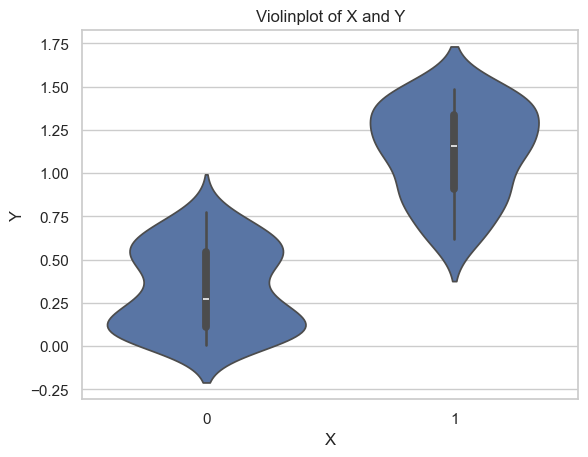

In [14]:
# Distribution of Y with respect to X
sns.violinplot(data=df2, x='X', y='Y')
plt.title("Violinplot of X and Y")
plt.xlabel("X")
plt.ylabel("Y")
None

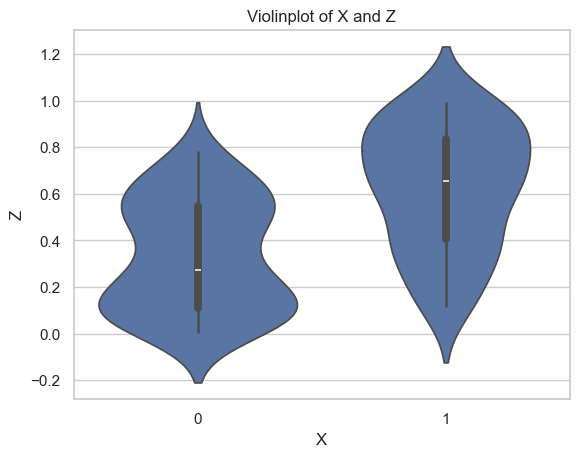

In [15]:
# Distribution of Z with respect to X
sns.violinplot(data=df2, x='X', y='Z')
plt.title("Violinplot of X and Z")
plt.xlabel("X")
plt.ylabel("Z")
None

In [20]:
# Find the nearest neighbors
from sklearn.neighbors import NearestNeighbors

# Find the best match of X = 0 and X = 1 based on the Z variable
df2_X0 = df2[df2['X'] == 0]
df2_X1 = df2[df2['X'] == 1]

# Fit the nearest neightbors model based on the Z variable
nbrs = NearestNeighbors(n_neighbors=1)
model = nbrs.fit(df2_X0[['Z']])

# Find the nearest neighbot for each point in df2_X0
prediction = nbrs.kneighbors(df2_X1[['Z']])

# Print out the results of the matches
matched_controls = df2_X0.iloc[prediction[1].flatten()]

In [ ]:
# caluclate the difference in means of the controls vs treated
mean_diff = df2_X1.Y.mean() - matched_controls.Y.mean()
mean_diff

np.float64(0.5433600651913855)

In [37]:
mean_diff_vals = df2_X1.Y.reset_index() - matched_controls.Y.reset_index()
mean_diff_vals[['Y']].max()

Y    0.710217
dtype: float64

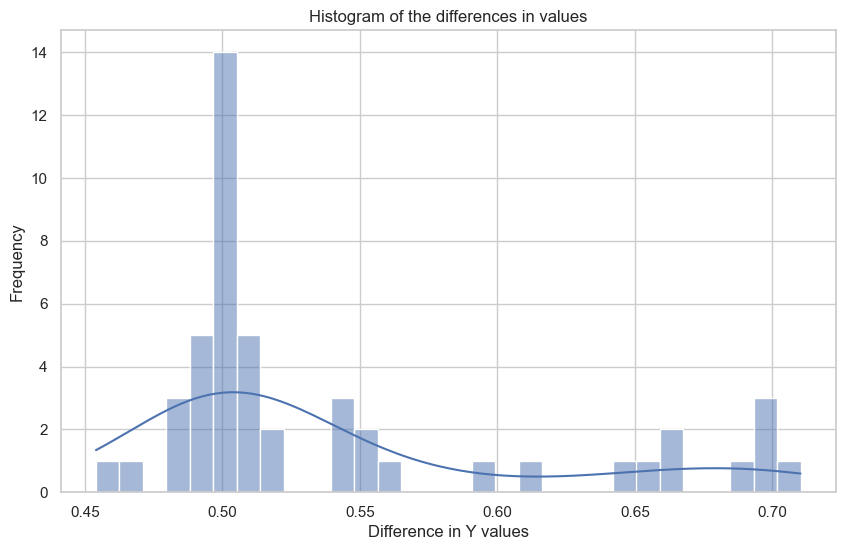

In [42]:
# create hist plot of the values
plt.figure(figsize=(10,6))
sns.histplot(mean_diff_vals['Y'], bins=30, kde=True)
plt.title("Histogram of the differences in values")
plt.xlabel("Difference in Y values")
plt.ylabel("Frequency")
None

In [41]:
mean_diff_vals.describe()

,index,Y
count,48.000000,48.000000
mean,6.145833,0.543360
std,36.784588,0.072722
min,-92.000000,0.454063
25%,-10.250000,0.498508
50%,2.500000,0.504486
75%,36.250000,0.555794
max,80.000000,0.710217


In [38]:
# Fit the nearest neightbors model based on the Z variable
nbrs_2 = NearestNeighbors(n_neighbors=1, radius=0.2)
model_2 = nbrs_2.fit(df2_X1[['Z']])

# Find the nearest neighbot for each point in df2_X0
prediction_2 = nbrs.radius_neighbors(df2_X0[['Z']])

In [40]:
prediction_2

(array([array([0.        , 0.05394987, 0.00393032, 0.1251587 , 0.01991858,
               0.01923106, 0.47777745, 0.4616842 , 0.52859511, 0.22934325,
               0.43053908, 0.40546022, 0.02696518, 0.13415156, 0.28425789,
               0.09266317, 0.5300237 , 0.06812049, 0.11178155, 0.48858803,
               0.11795321, 0.12182437, 0.33843094, 0.44676869, 0.33993675,
               0.10429482, 0.2955219 , 0.08250273, 0.30438791, 0.38984392,
               0.43843836, 0.10751609, 0.45171223, 0.4527151 , 0.0801623 ,
               0.19045008, 0.50962571, 0.26600654, 0.43008578, 0.23083032,
               0.48466601, 0.01778795, 0.28342401, 0.02556545, 0.45487299,
               0.02713299, 0.23024455, 0.41701564, 0.1675137 , 0.36562214,
               0.52870596, 0.54411803])                                   ,
        array([0.05394987, 0.        , 0.05788019, 0.17910858, 0.07386846,
               0.03471881, 0.53172732, 0.51563408, 0.58254498, 0.17539337,
               0.4844889